In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import nltk
import re
import string

In [2]:
from collections import Counter
sr = pd.read_csv('steam_reviews.csv', usecols=['review'])

In [3]:
rem = string.punctuation
pattern = r"[{}]".format(rem)
sr['review'] = sr['review'].str.replace(pattern, '')

In [4]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ezrafell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
words = (sr.review
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

In [6]:
top_N = 20

In [7]:
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

         Frequency
Word              
game        493483
fun          90462
play         90210
get          82884
good         82357
like         75874
dont         55946
great        53593
time         51047
one          48811
really       46550
even         46002
people       44396
games        43618
still        43032
would        41839
friends      40060
buy          37633
playing      37432
best         37165


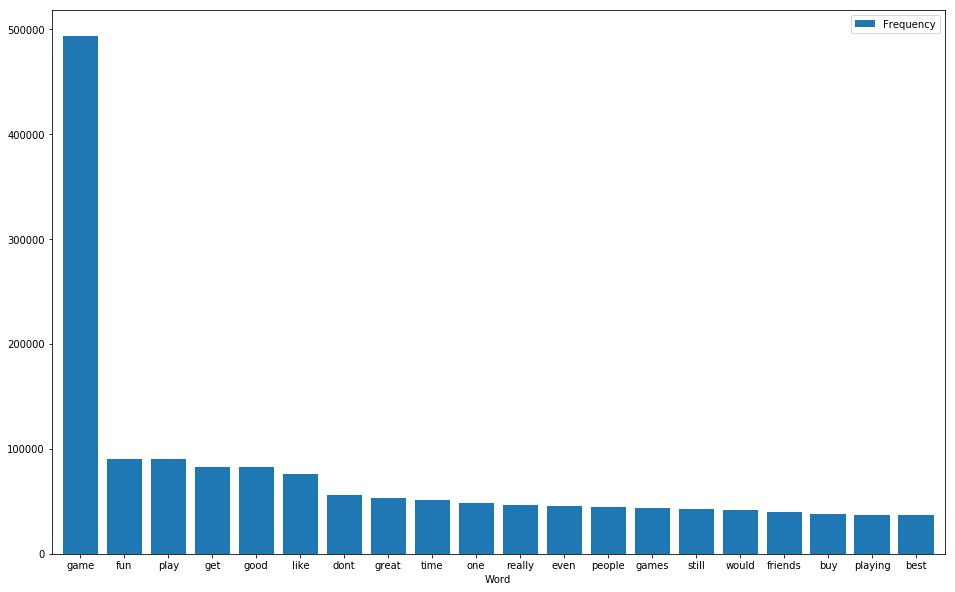

In [9]:
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)